# Fraud Detection System

Implements a fraud detection system using the Credit Card Fraud dataset. It includes data preprocessing, model training, evaluation, and a simple user interface visualization, Basic explainability

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
import shap
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


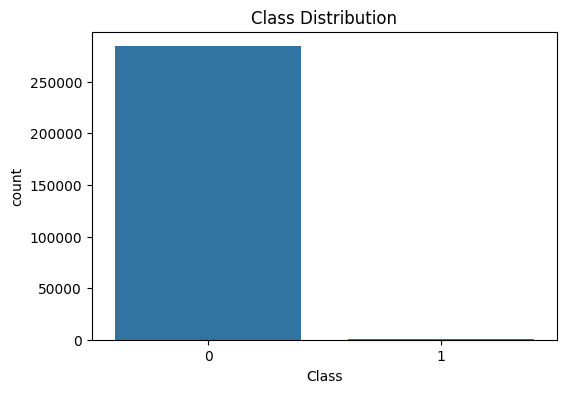

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

# Correlation Matrix..

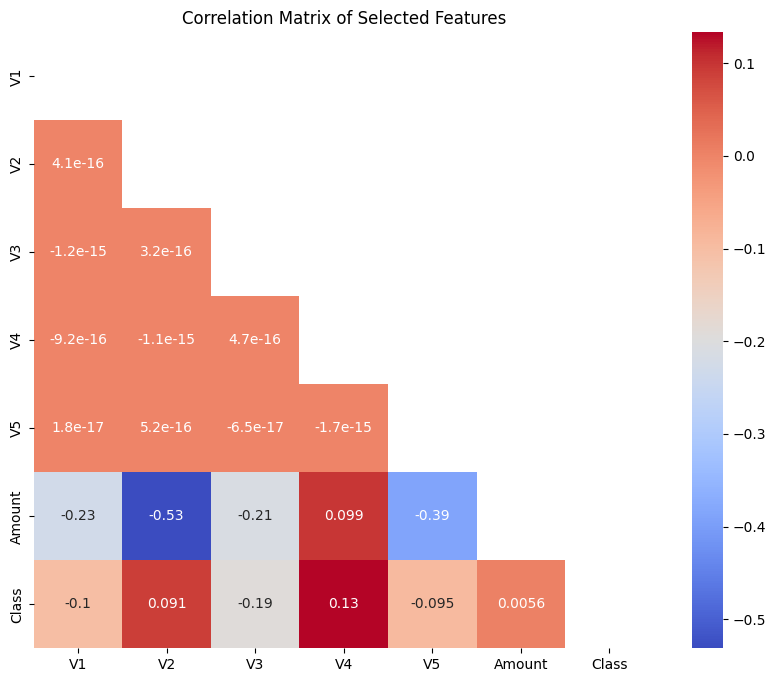

In [8]:
selected_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount', 'Class']  # we can add more features
plt.figure(figsize=(10, 8))
correlation = df[selected_features].corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix of Selected Features')
plt.show()

# Data Preprocessing

In [9]:
# separat features and target
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# convert back to df for handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# handle imbalanced data using smote for supervised learning..
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("\nClass distribution after smote:")
print(pd.Series(y_train_smote).value_counts())


Class distribution after smote:
Class
0    227451
1    227451
Name: count, dtype: int64


# Model Development

In [12]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_smote, y_train_smote)

# predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# evaluation for Logistic Regression
print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



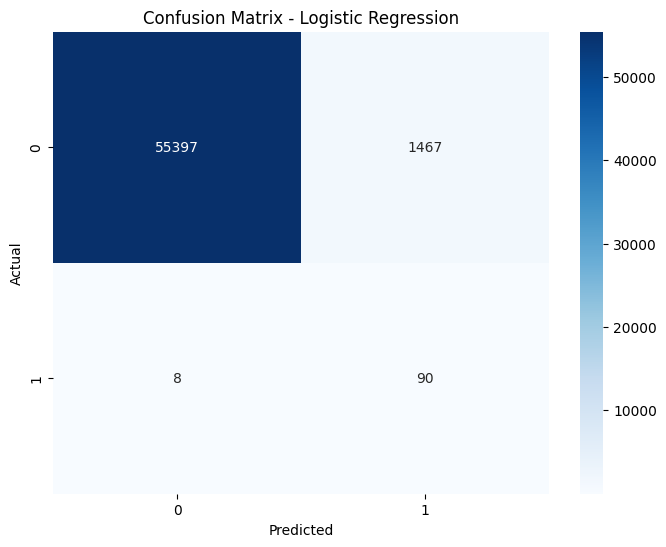

In [13]:
# confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [14]:
# XGBoost model
xgb_model = XGBClassifier(
    random_state=42,
    scale_pos_weight=1,
    learning_rate=0.1,
    n_estimators=100,
    max_depth=4
)
xgb_model.fit(X_train_smote, y_train_smote)

# predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# evaluation for XGBoost
print("\nXGBoost Results:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.89      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.94      0.63     56962
weighted avg       1.00      0.99      0.99     56962



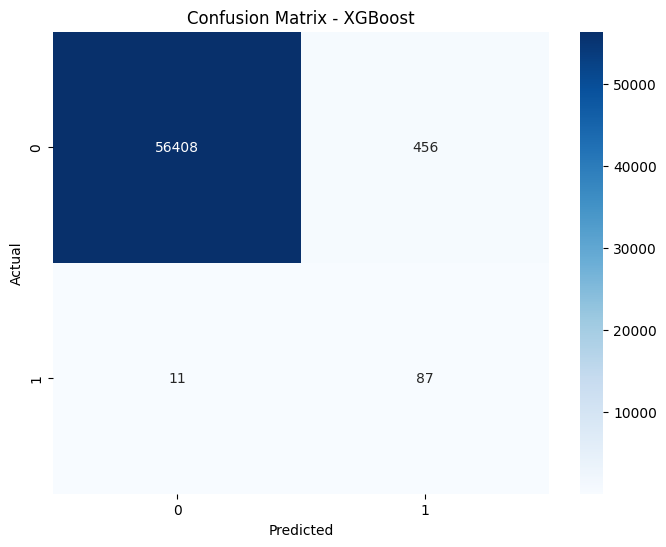

In [15]:
# confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Basic Explainability

<Figure size 1200x800 with 0 Axes>

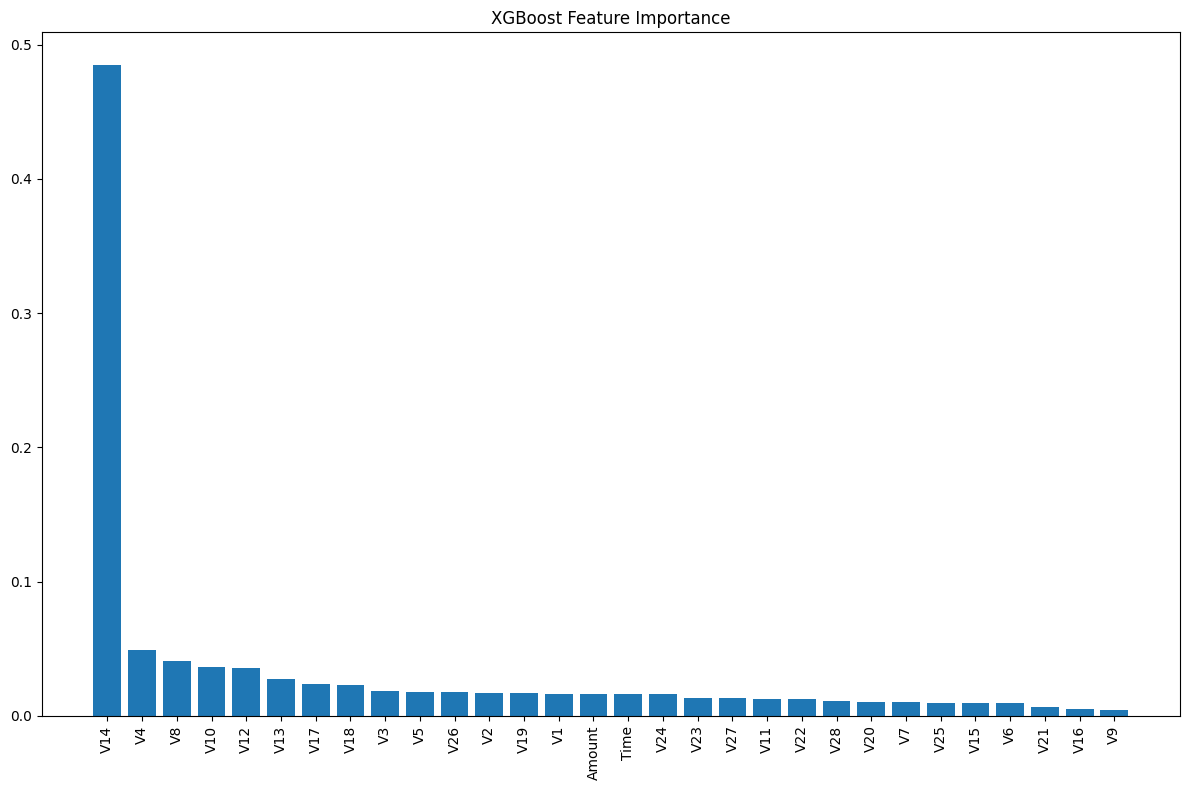

In [16]:
# Feature imp.. for XGBoost model
plt.figure(figsize=(12, 8))
xgb_importance = xgb_model.feature_importances_
indices = np.argsort(xgb_importance)[::-1]
feature_names = X.columns

# plot feature imp..
plt.figure(figsize=(12, 8))
plt.title('XGBoost Feature Importance')
plt.bar(range(len(indices)), xgb_importance[indices], align='center')
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


Isolation Forest (Unsupervised) Results:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.66      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.83      0.59     56962
weighted avg       1.00      0.99      0.99     56962


Model Performance Comparison:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.974106   0.057803  0.918367  0.108761
XGBoost              0.991802   0.160221  0.887755  0.271451
Isolation Forest     0.989712   0.105178  0.663265  0.181564


<Figure size 1200x800 with 0 Axes>

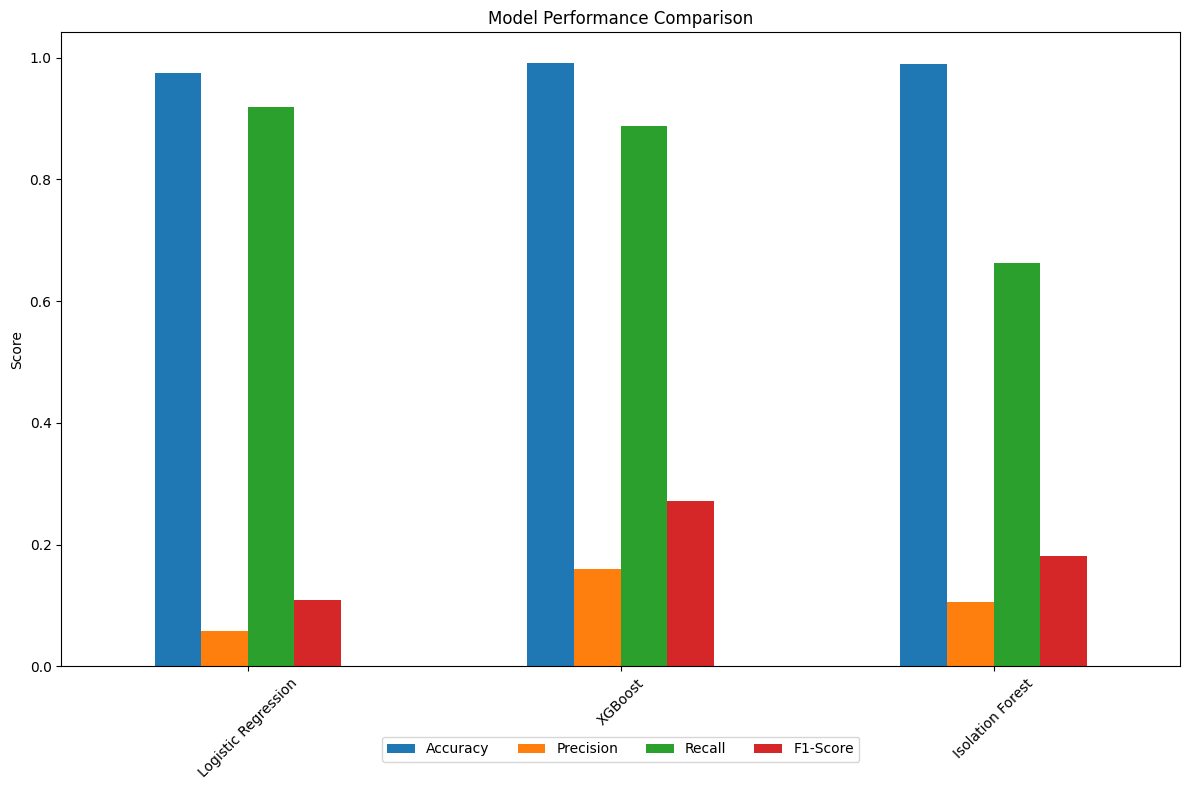

In [18]:
# train Isolation Forest on original data (without SMOTE)
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train_scaled)

# predict anomalies
anomaly_scores = iso_forest.decision_function(X_test_scaled)
anomaly_predictions = iso_forest.predict(X_test_scaled)
anomaly_predictions = np.where(anomaly_predictions == -1, 1, 0)

# Isolation Forest performance
print("\nIsolation Forest (Unsupervised) Results:")
print(classification_report(y_test, anomaly_predictions))

In [22]:
# all models
models = ['Logistic Regression', 'XGBoost', 'Isolation Forest']
y_preds = [y_pred_lr, y_pred_xgb, anomaly_predictions]

metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

for i, model in enumerate(models):
    metrics['Accuracy'].append(accuracy_score(y_test, y_preds[i]))
    metrics['Precision'].append(precision_score(y_test, y_preds[i]))
    metrics['Recall'].append(recall_score(y_test, y_preds[i]))
    metrics['F1-Score'].append(f1_score(y_test, y_preds[i]))

# comparison df
comparison_df = pd.DataFrame(metrics, index=models)
print("\nModel Performance Comparison:")
print(comparison_df)


Model Performance Comparison:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.974106   0.057803  0.918367  0.108761
XGBoost              0.991802   0.160221  0.887755  0.271451
Isolation Forest     0.989712   0.105178  0.663265  0.181564


<Figure size 1200x800 with 0 Axes>

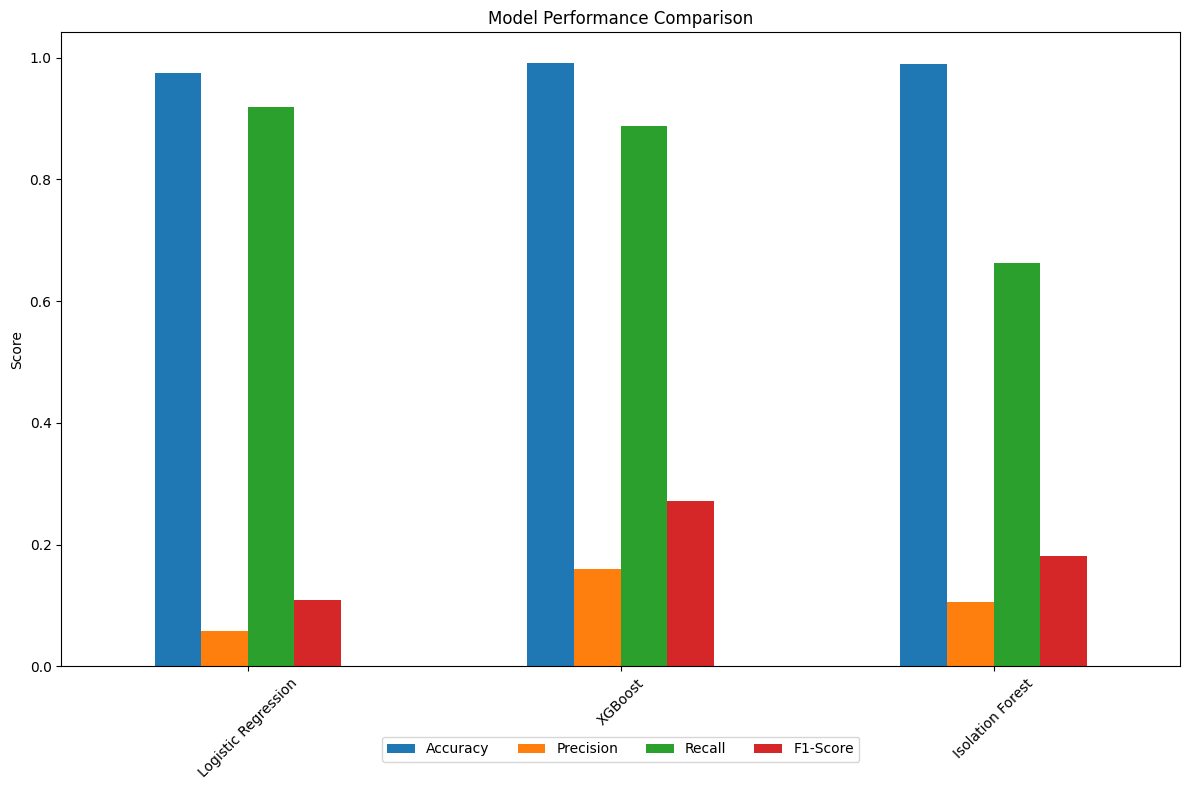

In [23]:
# plot comparison
plt.figure(figsize=(12, 8))
comparison_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.tight_layout()
plt.show()